# **By:  Sally Ghosn**

---
task  **1**
 
**Prediction using Supervised Machine Learning**

Data Science & Business Analytics Intern 


---






## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 

We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

This is a simple linear regression task as it involves just two variables.

---



# Importing the data

In [9]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [10]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
# To find the datatypes and missing values if any
s_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
# summary statistics
s_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# **data visualization**

---


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

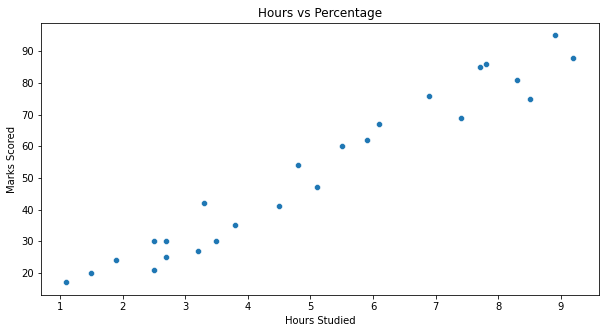

In [15]:
# Scatter plot to see the distribution of data
plt.figure(figsize=(10,5))
plt.title('Hours vs Percentage') 
sns.scatterplot(x=s_data.Hours,y=s_data.Scores)
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.show()

From the above graph we see that there is a positive linear relation between the number of Hours Studied and Marks Scored.

# 

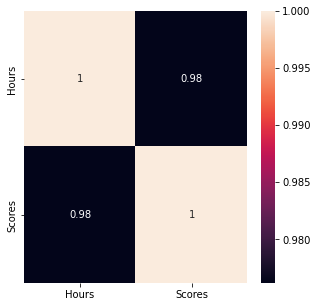

In [51]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = s_data.corr()

sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

From the above graph we see that Hours and Scores are highly correlated.

# **Preparing the data**


---


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).




In [21]:
# Dividing the Data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# **Training the Algorithm**


---


We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**Plotting the regression line**

In [25]:
line = regressor.coef_*X+regressor.intercept_

**Plotting for the test data**

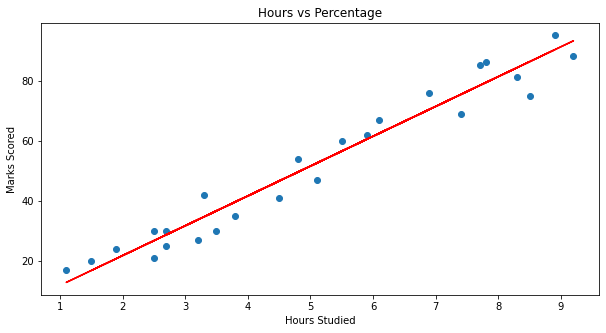

In [31]:
plt.figure(figsize=(10,5))
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  

plt.scatter(X, y)
plt.plot(X, line,color = 'r');
plt.show()

# **Making Predictions**


---


Now that we have trained our algorithm, it's time to make some predictions.

In [32]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
# Testing with your own data
hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


# **Evaluating the model**


---


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error: ',
       metrics.mean_squared_error(y_test, y_pred))

print('R-Square:',
      metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error:  21.598769307217456
R-Square: 0.9454906892105354
